0) Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
pd.set_option("display.precision", 3)
InteractiveShell.ast_node_interactivity = "all"
import os

# Extra imports
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from time import time
from datetime import timedelta

from sklearn.metrics import classification_report

np.random.seed(14)

In [2]:
local_dir = os.getcwd()
#data_path = COSTUM_DATA_LOCATION
#model_path = COSTUM_MODEL_LOCATION
data_path = os.path.join(os.path.dirname(os.path.dirname(local_dir)),'data')
model_path = os.path.join(os.path.dirname(local_dir),'models')

In [48]:
def multiclass_confusion(y_pred, y_true):
    ### Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    ## Get Class Labels
    labels = set(y_true)
    class_names = sorted(labels)

    # Plot confusion matrix in a beautiful manner
    fig = plt.figure(figsize=(16, 14))
    ax= plt.subplot()
    sn.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted', fontsize=20)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(class_names, fontsize = 10)
    ax.xaxis.tick_bottom()

    ax.set_ylabel('True', fontsize=20)
    ax.yaxis.set_ticklabels(class_names, fontsize = 10)
    plt.yticks(rotation=0)

    plt.title('Refined Confusion Matrix', fontsize=20)
    plt.show()

In [49]:
df = pd.read_csv("train_preprocessed.csv", index_col=0)
df['KMEANS_DEMEANOR'] = pd.Categorical(df['KMEANS_DEMEANOR'])

In [50]:
def prepare_data(dataframe, variables, num_scaling = True):
    x = dataframe.loc[:, dataframe.columns != 'SUSPECT_RACE_DESCRIPTION']
    y = dataframe.loc[:, 'SUSPECT_RACE_DESCRIPTION']
    X_train, X_test, y_train, y_test =\
        train_test_split(x,y, test_size=0.2, random_state=14, stratify=y)
    X_train = X_train.loc[:,variables]
    X_test = X_test.loc[:,variables]
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)
    X_train, X_test = X_train.align(X_test, join='inner', axis=1, fill_value=0)
    numericals = []
    for idx, types in enumerate(X_train.dtypes):
        if types == 'int64':
            numericals.append(X_train.columns[idx])
    if num_scaling:
        ct = ColumnTransformer([
                ('somename', StandardScaler(), numericals)
            ], remainder='passthrough')

        ct.fit_transform(X_train)
        ct.fit_transform(X_test)
    return X_train, X_test, y_train, y_test

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=14)

In [51]:
results_df = pd.DataFrame(index=['Logistic Regression'],
                          columns=['F-score (cv)', 'Precision (cv)','Recall (cv)', 'Accuracy (cv)'])

In [73]:
vars_to_keep = ['STOP_LOCATION_ZIP_CODE','SUSPECT_HAIR_COLOR','SUSPECT_EYE_COLOR'
,'STOP_LOCATION_BORO_NAME','SUSPECTED_CRIME_DESCRIPTION','FRISKED_FLAG','SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG','SUSPECT_ARREST_OFFENSE'	
,'BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG','FIREARM_FLAG','SUSPECT_BODY_BUILD_TYPE','BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG'	
,'OTHER_WEAPON_FLAG','WEAPON_FOUND_FLAG','VERBAL_IDENTIFIES_OFFICER_FLAG','SUSPECTS_ACTIONS_CASING_FLAG','SUPERVISING_OFFICER_RANK','DEMEANOR_CODE','MONTH2'
,'OFFICER_IN_UNIFORM_FLAG','SUSPECT_ARRESTED_FLAG','STOP_WAS_INITIATED','SEARCH_BASIS_HARD_OBJECT_FLAG','SEARCHED_FLAG','SUSPECT_SEX','OTHER_CONTRABAND_FLAG'	
,'SEARCH_BASIS_CONSENT_FLAG','IMMEDIATE_STOP_FLAG','STOP_DURATION_MINUTES','SUSPECT_REPORTED_AGE','SUSPECT_HEIGHT','SUSPECT_WEIGHT','KMEANS_DEMEANOR']

X_train, X_test, y_train, y_test = prepare_data(df, vars_to_keep)

In [79]:
df_structure = pd.DataFrame(data=None, columns=X_train.columns)
df_structure.to_csv('model_alignement.csv')

1) Baseline

c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

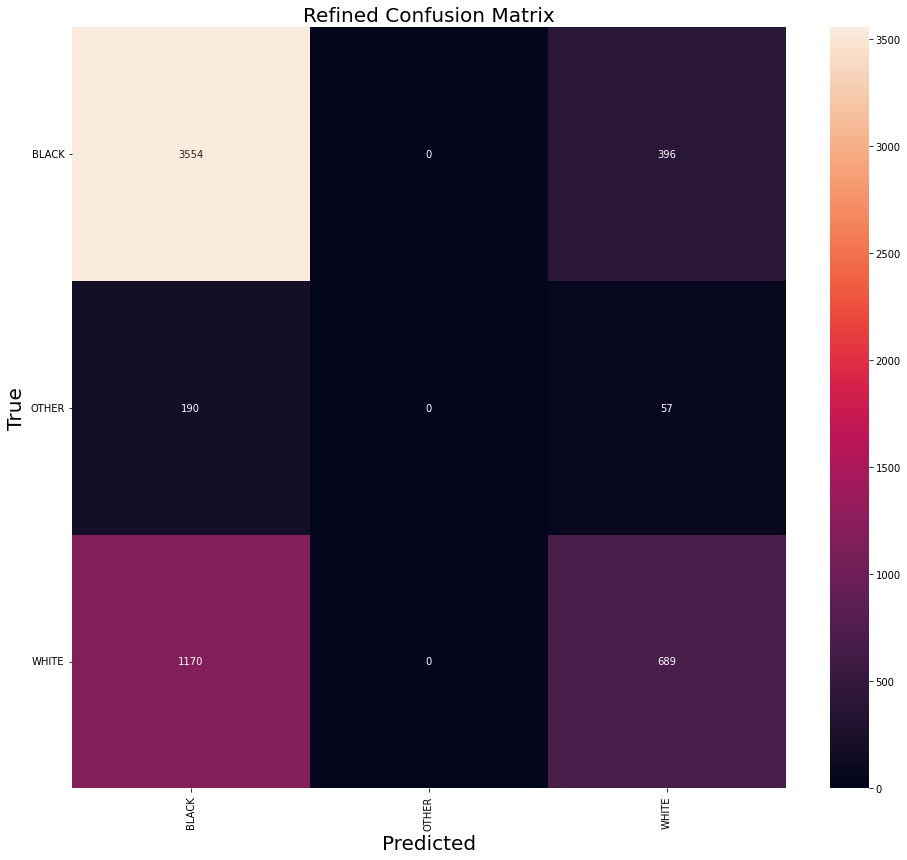

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression,0.414,0.439,0.418,0.696
MLP[1],0.517,0.567,0.5,0.697


In [66]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
scores = cross_val_score(logreg, X_train, y_train, cv=cv)
y_pred_lr = logreg.predict(X_train)

cross_val_results = pd.DataFrame(cross_validate(logreg , X_train, y_train, cv = cv, 
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Logistic Regression',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

multiclass_confusion(y_pred_lr, y_train)
results_df

2) Trying Out Models

c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=[15, 15, 15],
              max_iter=500, random_state=14)

Confusion matrix of the TRAIN dataset


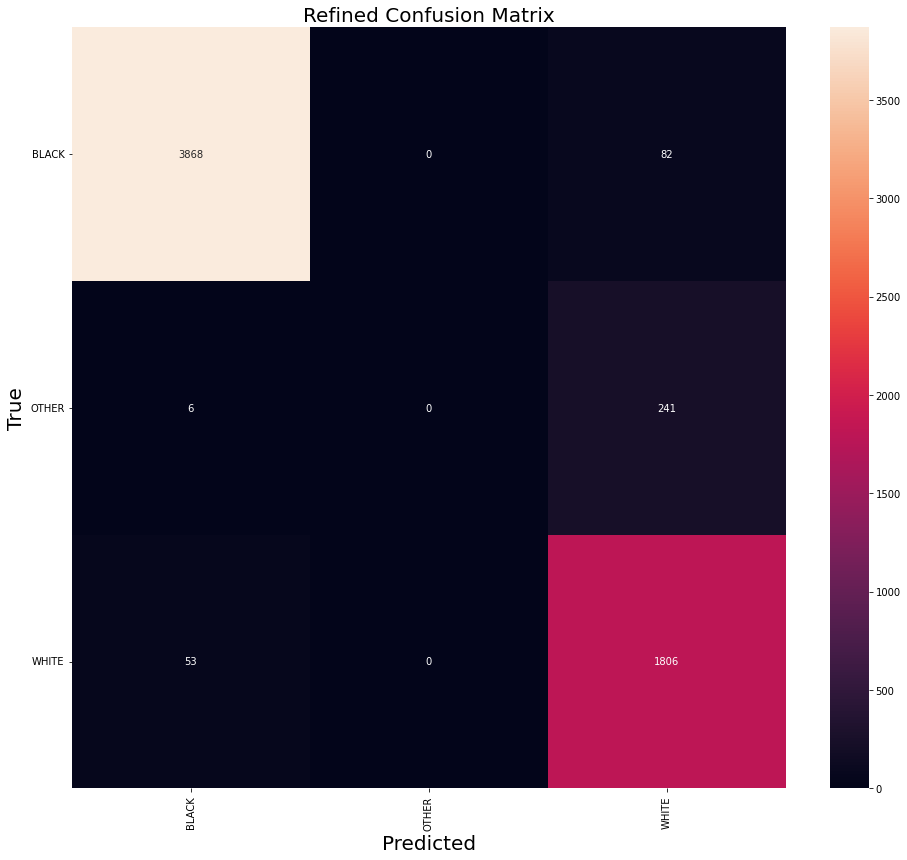

Confusion matrix of the TEST dataset


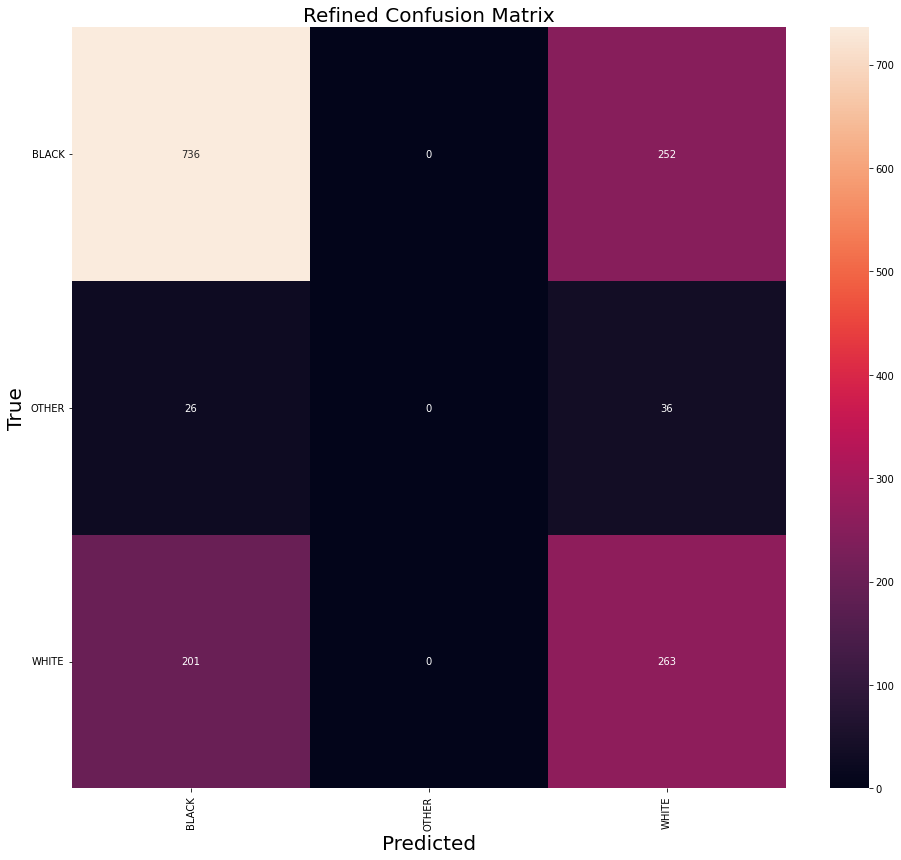

c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
MLP[1],0.443,0.444,0.451,0.675
Logistic Regression,0.414,0.439,0.418,0.696


In [67]:
X_train, X_test, y_train, y_test = prepare_data(df, vars_to_keep)

model_nnet1 = MLPClassifier(hidden_layer_sizes=[15, 15, 15],
                           alpha=0.0001,
                           activation='logistic',
                           max_iter=500,
                           solver='adam',random_state=14)

model_nnet1.fit(X_train, y_train)
y_pred = model_nnet1.predict(X_train)
y_pred_test = model_nnet1.predict(X_test)

print('Confusion matrix of the TRAIN dataset')
multiclass_confusion(y_pred,y_train)

print('Confusion matrix of the TEST dataset')
multiclass_confusion(y_pred_test,y_test)

cross_val_results = pd.DataFrame(cross_validate(model_nnet1 , X_train, y_train, cv = 5, 
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['MLP[1]',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

(6056, 304)


MLPClassifier(activation='logistic', hidden_layer_sizes=[100, 50],
              learning_rate='adaptive', max_iter=1000, random_state=14)

Confusion matrix of the TRAIN dataset


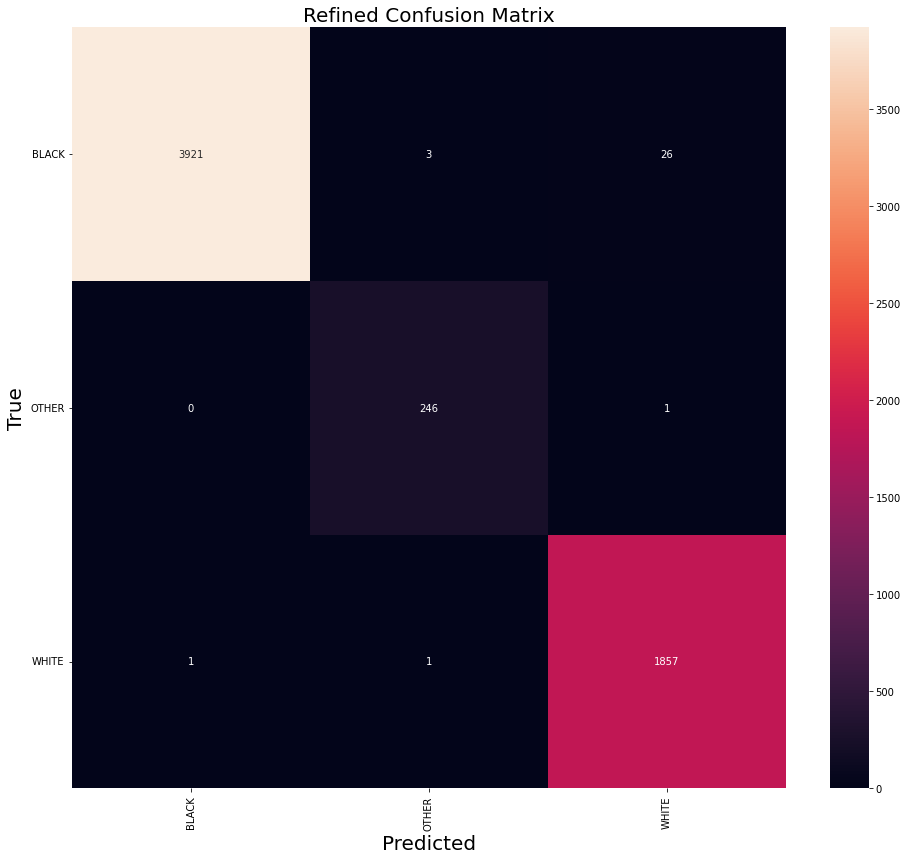

Confusion matrix of the TEST dataset


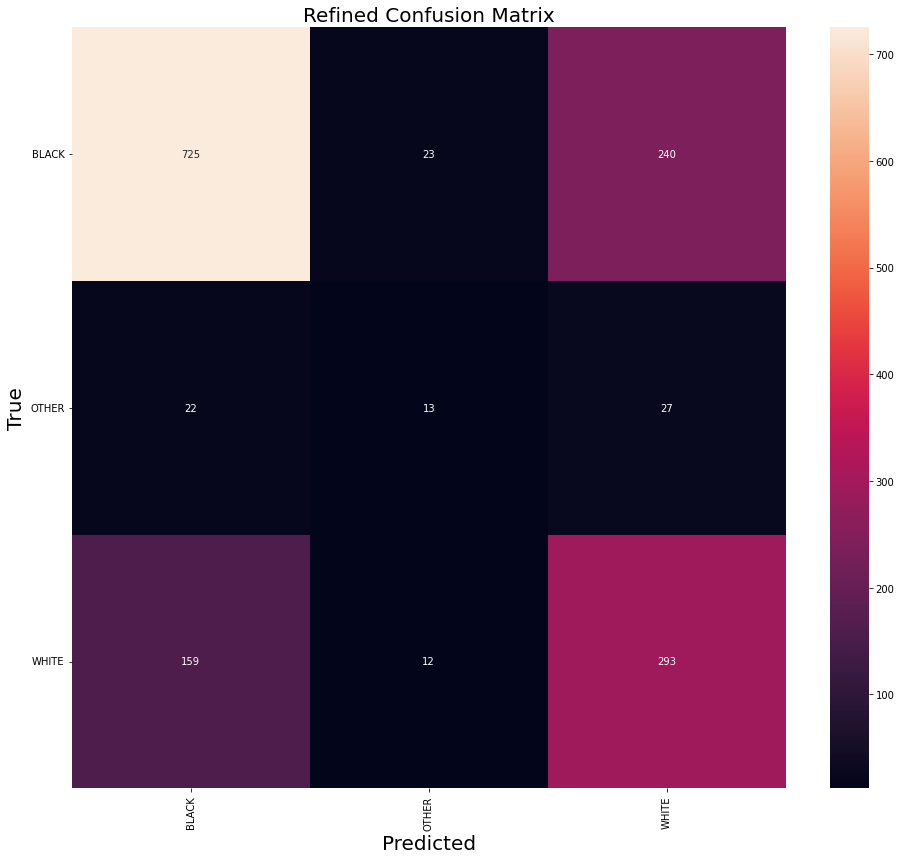

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
MLP[1],0.539,0.564,0.527,0.695
Logistic Regression,0.414,0.439,0.418,0.696


In [68]:
X_train, X_test, y_train, y_test = prepare_data(df, vars_to_keep)
print(X_train.shape)

model_nnet2 = MLPClassifier(hidden_layer_sizes=[100, 50],
                           alpha=0.0001,
                           activation='logistic',
                           learning_rate='adaptive',
                           max_iter=1000,
                           solver='adam',random_state=14)

model_nnet2.fit(X_train, y_train)
y_pred = model_nnet2.predict(X_train)
y_pred_test = model_nnet2.predict(X_test)

print('Confusion matrix of the TRAIN dataset')
multiclass_confusion(y_pred,y_train)

print('Confusion matrix of the TEST dataset')
multiclass_confusion( y_pred_test,y_test)

cross_val_results = pd.DataFrame(cross_validate(model_nnet2 , X_train, y_train, cv = 5, 
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['MLP[1]',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

With MCA data set..

In [14]:
df_mca=pd.read_csv(os.path.join(data_path,"train_preprocessed_mca.csv"), index_col = 0)
x = df_mca.loc[:, df_mca.columns != 'SUSPECT_RACE_DESCRIPTION']
y = df_mca.loc[:, 'SUSPECT_RACE_DESCRIPTION']
X_train, X_test, y_train, y_test =\
    train_test_split(x,y, test_size=0.2, random_state=14, stratify=y)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=[15, 15, 15],
              learning_rate='adaptive', max_iter=1000, random_state=14,
              solver='lbfgs')

Confusion matrix of the TRAIN dataset


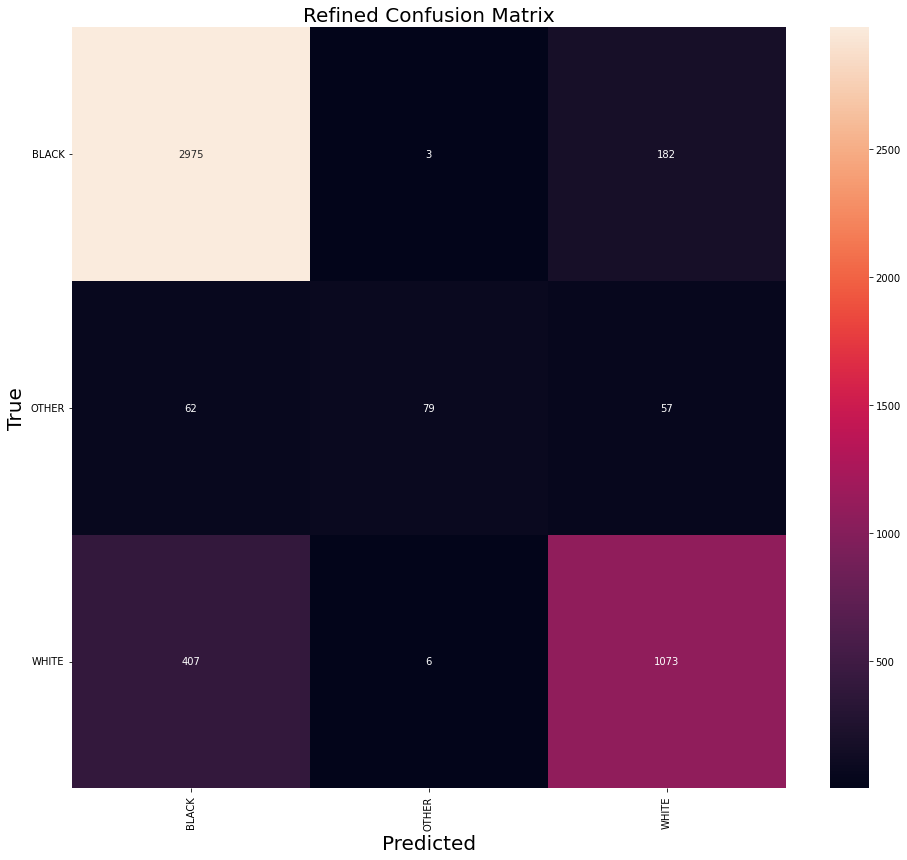

Confusion matrix of the TEST dataset


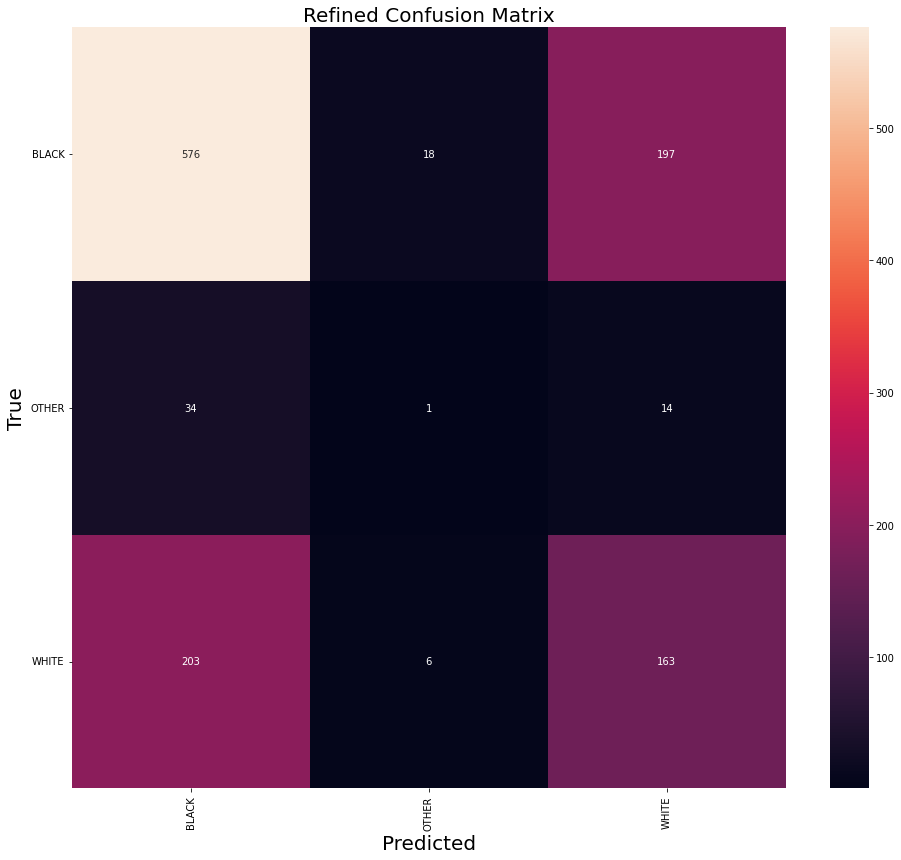

c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
MLP[1],0.627,0.627,0.627,0.627
Empty,NaN,NaN,NaN,NaN


In [18]:
model_mca_nnet = MLPClassifier(hidden_layer_sizes=[10,10],
                           alpha=0.0001,
                           activation='logistic',
                           learning_rate='adaptive',
                           max_iter=1000,
                           solver='adam',random_state=14)

model_mca_nnet.fit(X_train, y_train)
y_pred = model_mca_nnet.predict(X_train)
y_pred_test = model_mca_nnet.predict(X_test)

print('Confusion matrix of the TRAIN dataset')
multiclass_confusion(y_pred,y_train)

print('Confusion matrix of the TEST dataset')
multiclass_confusion( y_pred_test,y_test)

cross_val_results = pd.DataFrame(cross_validate(model_mca_nnet , X_train, y_train, cv = 5, 
                                                scoring = [ 'f1_micro', 'precision_micro', 'recall_micro', 'accuracy'] ))

results_df.loc['MLP[1]',:] = cross_val_results[['test_f1_micro',
       'test_precision_micro', 'test_recall_micro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

3) GridSearch 

In [10]:
sizes = [3*i for i in range(1,5)]
sizes = sizes + [[3*i,3*i] for i in range(1,5)]
sizes = sizes + [[3*i,3*i, 3*i] for i in range(1,5)]

print(len(sizes), sizes)


decays = [0.00001,0.0001,0.001,0.01,0.1,0.5]
print(len(decays), decays[:10])

solvers = ['adam', 'lbfgs']

12 [3, 6, 9, 12, [3, 3], [6, 6], [9, 9], [12, 12], [3, 3, 3], [6, 6, 6], [9, 9, 9], [12, 12, 12]]
6 [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5]


In [58]:
from sklearn.model_selection import GridSearchCV

init_time=time()

vars_to_keep = ['SUSPECT_HAIR_COLOR','SUSPECT_EYE_COLOR'
,'STOP_LOCATION_BORO_NAME','SUSPECTED_CRIME_DESCRIPTION','FRISKED_FLAG','SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG','SUSPECT_ARREST_OFFENSE'	
,'BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG','FIREARM_FLAG','SUSPECT_BODY_BUILD_TYPE','BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG'	
,'OTHER_WEAPON_FLAG','WEAPON_FOUND_FLAG','VERBAL_IDENTIFIES_OFFICER_FLAG','SUSPECTS_ACTIONS_CASING_FLAG','SUPERVISING_OFFICER_RANK','DEMEANOR_CODE','MONTH2'
,'OFFICER_IN_UNIFORM_FLAG','SUSPECT_ARRESTED_FLAG','STOP_WAS_INITIATED','SEARCH_BASIS_HARD_OBJECT_FLAG','SEARCHED_FLAG','SUSPECT_SEX','OTHER_CONTRABAND_FLAG'	
,'SEARCH_BASIS_CONSENT_FLAG','IMMEDIATE_STOP_FLAG','STOP_DURATION_MINUTES','SUSPECT_REPORTED_AGE','SUSPECT_HEIGHT','SUSPECT_WEIGHT','STOP_FRISK_TIME_HOUR'          
,'KMEANS_DEMEANOR']

X_train, X_test, y_train, y_test = prepare_data(df, vars_to_keep)

model_nnet_grid = MLPClassifier(alpha=0,
                           activation='logistic',
                           max_iter=500,random_state=14)

trc = GridSearchCV(estimator=model_nnet_grid,
                   scoring=['f1_macro', 'precision_macro', 'recall_macro', 'accuracy'],
                   param_grid={'hidden_layer_sizes': sizes,
                              'alpha': decays,
                              'solver': solvers},
                   cv=10,
                   return_train_score=True,
                   refit='f1_macro')

model_10CV = trc.fit(X_train, y_train)
print(timedelta(seconds=(time()-init_time)))

c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\metrics

2:30:40.714081


c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [59]:
trc.best_params_

{'alpha': 1e-05, 'hidden_layer_sizes': 9, 'solver': 'adam'}

In [70]:
pd.DataFrame(model_10CV.cv_results_).loc[:,['param_alpha','param_hidden_layer_sizes', 'param_solver', 'mean_test_f1_macro', 
                                            'std_test_f1_macro']].sort_values(by='mean_test_f1_macro',
                                                                                                ascending=False).head()

,param_alpha,param_hidden_layer_sizes,param_solver,mean_test_f1_macro,std_test_f1_macro
4,0.0,9,adam,0.472,0.027
30,0.0,12,adam,0.461,0.033
14,0.0,"[12, 12]",adam,0.460,0.044
6,0.0,12,adam,0.459,0.031
38,0.0,"[12, 12]",adam,0.454,0.031


In [64]:
pd.DataFrame(model_10CV.cv_results_).loc[:,['param_alpha','param_hidden_layer_sizes', 'param_solver', 'mean_test_f1_macro', 
                                            'std_test_f1_macro', 'mean_test_precision_macro', 'std_test_precision_macro',
                                        'mean_test_accuracy','std_test_accuracy']].sort_values(by='mean_test_f1_macro',
                                                                                                ascending=False).head()

,param_alpha,param_hidden_layer_sizes,param_solver,mean_test_f1_macro,std_test_f1_macro,mean_test_precision_macro,std_test_precision_macro,mean_test_accuracy,std_test_accuracy
4,0.0,9,adam,0.472,0.027,0.556,0.069,0.696,0.024
30,0.0,12,adam,0.461,0.033,0.548,0.076,0.691,0.025
14,0.0,"[12, 12]",adam,0.460,0.044,0.538,0.116,0.686,0.025
6,0.0,12,adam,0.459,0.031,0.551,0.084,0.689,0.016
38,0.0,"[12, 12]",adam,0.454,0.031,0.512,0.075,0.683,0.025


4) Running The Best Model 

c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=[9],
              max_iter=500, random_state=14)

Confusion matrix of the TRAIN dataset


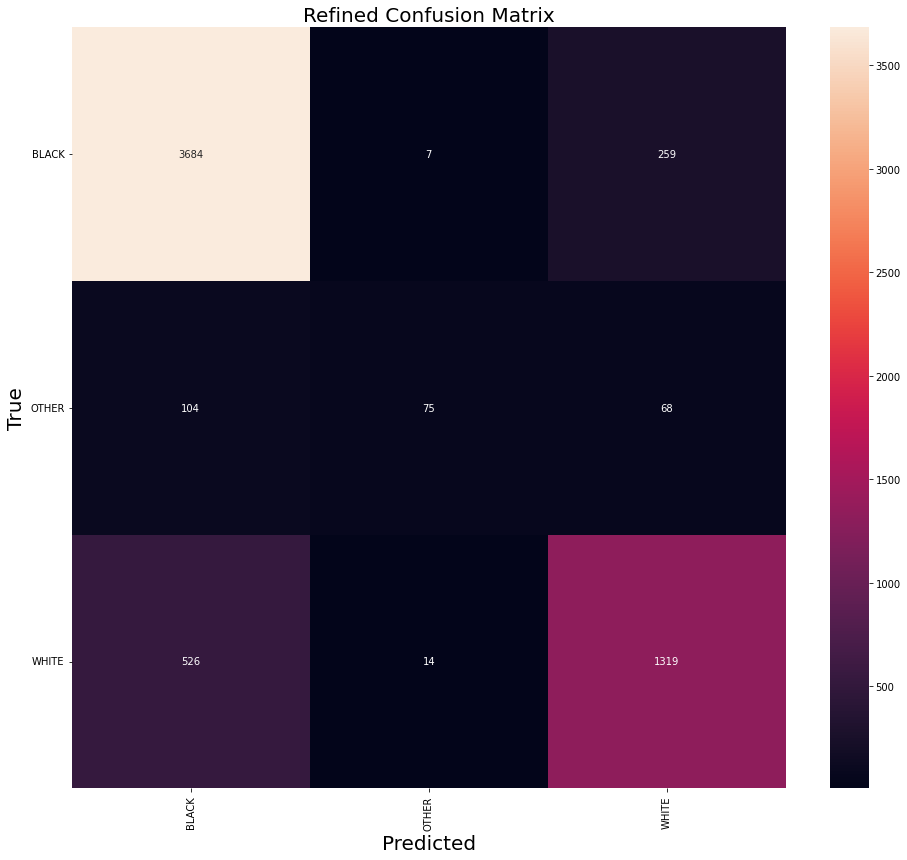

Confusion matrix of the TEST dataset


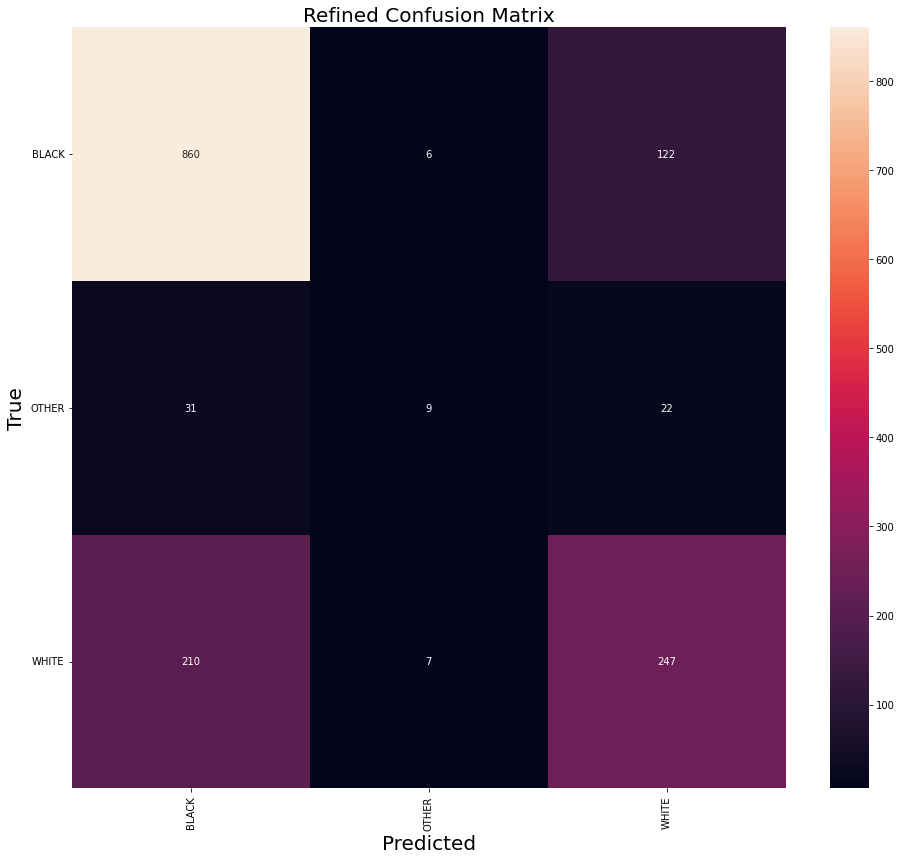

c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\anaconda3\envs\BDM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\anaconda3\envs\BDM\li

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
MLP[1],0.517,0.567,0.5,0.697
Logistic Regression,0.407,0.435,0.412,0.691


In [61]:
vars_to_keep = ['STOP_LOCATION_ZIP_CODE','SUSPECT_HAIR_COLOR','SUSPECT_EYE_COLOR'
,'STOP_LOCATION_BORO_NAME','SUSPECTED_CRIME_DESCRIPTION','FRISKED_FLAG','SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG','SUSPECT_ARREST_OFFENSE'	
,'BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG','FIREARM_FLAG','SUSPECT_BODY_BUILD_TYPE','BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG'	
,'OTHER_WEAPON_FLAG','WEAPON_FOUND_FLAG','VERBAL_IDENTIFIES_OFFICER_FLAG','SUSPECTS_ACTIONS_CASING_FLAG','SUPERVISING_OFFICER_RANK','DEMEANOR_CODE','MONTH2'
,'OFFICER_IN_UNIFORM_FLAG','SUSPECT_ARRESTED_FLAG','STOP_WAS_INITIATED','SEARCH_BASIS_HARD_OBJECT_FLAG','SEARCHED_FLAG','SUSPECT_SEX','OTHER_CONTRABAND_FLAG'	
,'SEARCH_BASIS_CONSENT_FLAG','IMMEDIATE_STOP_FLAG','STOP_DURATION_MINUTES','SUSPECT_REPORTED_AGE','SUSPECT_HEIGHT','SUSPECT_WEIGHT','STOP_FRISK_TIME_HOUR'          
,'KMEANS_DEMEANOR']

X_train, X_test, y_train, y_test = prepare_data(df, vars_to_keep)

model_best = MLPClassifier(hidden_layer_sizes=[9],
                           alpha=0.00001,
                           activation='logistic',
                           max_iter=500,
                           solver='adam',random_state=14)

model_best.fit(X_train, y_train)
y_pred = model_best.predict(X_train)
y_pred_test = model_best.predict(X_test)

print('Confusion matrix of the TRAIN dataset')
multiclass_confusion(y_pred,y_train)

print('Confusion matrix of the TEST dataset')
multiclass_confusion( y_pred_test,y_test)

cross_val_results = pd.DataFrame(cross_validate(model_best , X_train, y_train, cv = 5, 
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['MLP[1]',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

In [72]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_test, average=None)

array([0.7655755 , 0.23636364, 0.57226562])